# Run and tumble particles

## Input parameters

In [73]:
#Number of particles
N=10

#Particle velocity
v0=1. #mu/s

#box size
box_x=300 #mu
box_y=300 #mu

#Total time
t_tot=100. #seg

#Time step
deltat=0.1 #seg

#Probability of tumble each second:
p_s=0.2

## Main. It plots the trajectories

Populating the interactive namespace from numpy and matplotlib


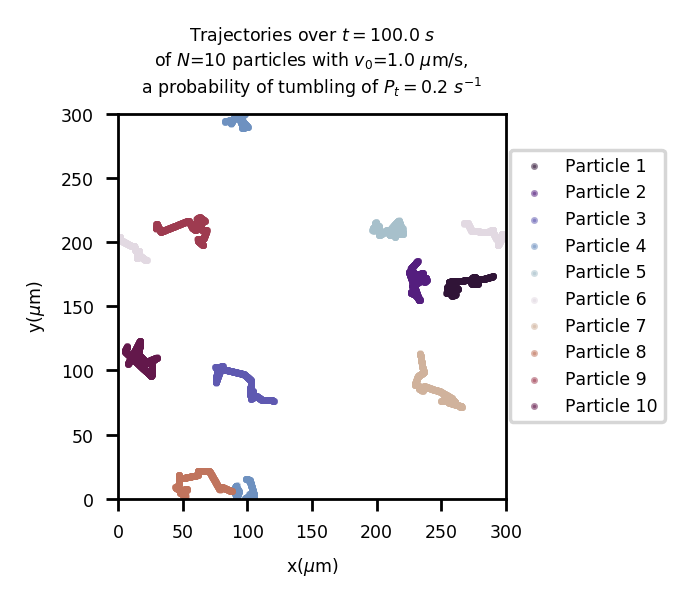

In [86]:
%pylab inline
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
mpl.rcParams.update(mpl.rcParamsDefault)


# Calculates next position for particle at time ti
def particulai(xi,yi,thetai,ti,deltat,v0,p_tbl,box_x,box_y):

        if np.less(np.random.random_sample(),p_tbl):
            thetanew=2*pi*np.random.random_sample()

        else:   
            thetanew=thetai

        vx=v0*np.cos(thetanew)
        vy=v0*np.sin(thetanew)

        v=np.sqrt(vx*vx+vy*vy)

        xnew=xi+vx*deltat
        ynew=yi+vy*deltat
        
        #PBC
        if (xnew)>box_x: 
            xnew=np.absolute(xnew-box_x)
        if (xnew)<0: 
            xnew=box_x-xnew
        if ynew>box_y:
            ynew=np.absolute(ynew-box_y)
        if (ynew)<0: 
            ynew=box_y-ynew

        return xnew,ynew,thetanew

#Font size for graphs:
mysize=5

# Colormap. 
colors = plt.cm.twilight_shifted(np.linspace(0,1,N+1))

#Tumble probability each time step
p_tbl=p_s*deltat

#Number of time steps
num_steps=np.int(t_tot/deltat)


x=np.zeros([num_steps,N])
y=np.zeros([num_steps,N])
t=np.zeros([num_steps,1])
theta=np.zeros([num_steps,N])
dr=np.zeros([num_steps,N,N])


t=deltat*np.arange(num_steps)

fig = plt.figure(figsize=(2,2),dpi=250)
ax = fig.add_subplot(111)


for k in range(0,N):

    x[0,k]=box_x*np.random.random_sample()
    y[0,k]=box_y*np.random.random_sample()
    theta[0,k]=2*pi*np.random.random_sample()     
    
    for i in range(num_steps-1):
        (x[i+1,k],y[i+1,k],theta[i+1,k])=particulai(x[i,k],y[i,k],theta[i,k],t[i],deltat,v0,p_tbl,box_x,box_y)


    plt.title( 'Trajectories over $t=$' + str(t_tot) + ' $s$ \n'
              'of $N$=' + str(N) + ' particles with $v_0$=' + str(v0) + ' $\mu$m/s, \n'
                    'a probability of tumbling of $P_t=$' + str(p_s) + ' $s^{-1}$', fontsize=mysize)            
    plt.xlabel('x($\mu$m)',fontsize=mysize)
    plt.ylabel('y($\mu$m)',fontsize=mysize)
    
    plt.xlim(right=box_x,left=0)
    plt.ylim(top=box_y,bottom=0)
    
    
    plt.scatter(x[:,k],y[:,k],color=colors[k],alpha=0.5,label='Particle ' + str(k+1),s=1)
    
    ax.legend(fontsize=mysize)

    ax.tick_params(labelsize=mysize)

    plt.legend(fontsize=mysize)
    plt.legend(loc=(1.01,0.2),fontsize=mysize) 

plt.show()

## Creates a video for the previously generated trajectories

In [87]:
from matplotlib import animation
from IPython.display import HTML

fr_ps=np.int(1./deltat)

# Speed up the video:
speed=10. 

fig = plt.figure(figsize=(2.7,2.6),dpi=250)
ax = plt.axes(xlim=(0, box_x), ylim=(0, box_y)) 
scat = ax.scatter([], [], s=15, color='darkred') 
line, = ax.plot([], [], lw=2) 

plt.title( 'Particles with $v_0$=' + str(v0) + ' $\mu$m/s, a probability of tumbling \n'
            '$P_t=$' + str(p_s) + ' $s^{-1}$ (video speed ' + str(speed) + 'x)', fontsize=mysize)            
plt.xlabel('x($\mu$m)',fontsize=mysize)
plt.ylabel('y($\mu$m)',fontsize=mysize)
ax.tick_params(labelsize=mysize)
plt.tight_layout()


def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 


transpxy=np.transpose([x, y])

# animation function 
def animate(i): 
    scat.set_offsets(transpxy[:,i])
    return scat, 
    
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                        frames=num_steps, interval=100/speed, blit=True) 

HTML(anim.to_html5_video())



## Save the animation as mp4 video file:

In [88]:
anim.save('run_and_tumble.mp4', writer = 'ffmpeg', fps = speed*fr_ps) 